<a href="https://colab.research.google.com/github/Abdulmathin-shaik/Kaggle/blob/main/Global_Wheat_Detection_YOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pwd

/content


In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle competitions download -c global-wheat-detection


 99% 603M/607M [00:04<00:00, 142MB/s]
100% 607M/607M [00:04<00:00, 128MB/s]


In [ ]:
!unzip global-wheat-detection.zip


In [13]:
import matplotlib.pyplot as plt
import cv2
import pandas as pd
import numpy as np
import os,shutil
import ast
import random

In [14]:
df = pd.read_csv('/content/train.csv')

In [15]:
df.head()

,image_id,width,height,bbox,source
0,b6ab77fd7,1024,1024,"[834.0, 222.0, 56.0, 36.0]",usask_1
1,b6ab77fd7,1024,1024,"[226.0, 548.0, 130.0, 58.0]",usask_1
2,b6ab77fd7,1024,1024,"[377.0, 504.0, 74.0, 160.0]",usask_1
3,b6ab77fd7,1024,1024,"[834.0, 95.0, 109.0, 107.0]",usask_1
4,b6ab77fd7,1024,1024,"[26.0, 144.0, 124.0, 117.0]",usask_1


In [17]:
df[df['image_id'] == '00333207f']

,image_id,width,height,bbox,source
42569,00333207f,1024,1024,"[0, 654, 37, 111]",arvalis_1
42570,00333207f,1024,1024,"[0, 817, 135, 98]",arvalis_1
42571,00333207f,1024,1024,"[0, 192, 22, 81]",arvalis_1
42572,00333207f,1024,1024,"[4, 342, 63, 38]",arvalis_1
42573,00333207f,1024,1024,"[82, 334, 82, 81]",arvalis_1
42574,00333207f,1024,1024,"[30, 296, 48, 49]",arvalis_1
42575,00333207f,1024,1024,"[176, 316, 70, 54]",arvalis_1
42576,00333207f,1024,1024,"[176, 126, 69, 51]",arvalis_1
42577,00333207f,1024,1024,"[203, 38, 42, 85]",arvalis_1
42578,00333207f,1024,1024,"[3, 142, 89, 58]",arvalis_1


In [18]:
def preprocess(df_any):
    #convert the bboxes str -> list
    df_any['bbox'] = df_any['bbox'].apply(ast.literal_eval)
    df_any[['x1','y1','width','height']] = pd.DataFrame(df_any['bbox'].tolist(),index = df.index)
    df_any['x_center'] = ((df_any['x1']+df_any['width'])/2)/1024
    df_any['y_center'] = ((df_any['y1']+df_any['height'])/2)/1024
    df_any['wid_n'] = df_any['width']/1024
    df_any['height_n'] = df_any['height']/1024
    return df_any

In [19]:
preprocessed_df = preprocess(df)

In [20]:
preprocessed_df['x2'] = preprocessed_df['x1']+preprocessed_df['width']
preprocessed_df['y2'] = preprocessed_df['y1']+preprocessed_df['height']

In [21]:
preprocessed_df.head()

,image_id,width,height,bbox,source,x1,y1,x_center,y_center,wid_n,height_n,x2,y2
0,b6ab77fd7,56.0,36.0,"[834.0, 222.0, 56.0, 36.0]",usask_1,834.0,222.0,0.434570,0.125977,0.054688,0.035156,890.0,258.0
1,b6ab77fd7,130.0,58.0,"[226.0, 548.0, 130.0, 58.0]",usask_1,226.0,548.0,0.173828,0.295898,0.126953,0.056641,356.0,606.0
2,b6ab77fd7,74.0,160.0,"[377.0, 504.0, 74.0, 160.0]",usask_1,377.0,504.0,0.220215,0.324219,0.072266,0.156250,451.0,664.0
3,b6ab77fd7,109.0,107.0,"[834.0, 95.0, 109.0, 107.0]",usask_1,834.0,95.0,0.460449,0.098633,0.106445,0.104492,943.0,202.0
4,b6ab77fd7,124.0,117.0,"[26.0, 144.0, 124.0, 117.0]",usask_1,26.0,144.0,0.073242,0.127441,0.121094,0.114258,150.0,261.0


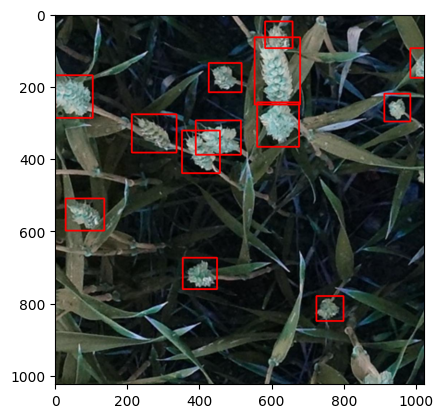

In [22]:
#function for creating the image with boxes
random_image_id = random.choice(df['image_id'].unique())
image_info = df[df['image_id']==random_image_id]

bboxes = image_info[['x1','y1','x2','y2']].values
image = cv2.imread(f'/content/train/{random_image_id}.jpg')
# image/=255
for bbox in bboxes:
    x1,y1,x2,y2 = bbox
    cv2.rectangle(image,(int(x1),int(y1)),(int(x2),int(y2)),(255,0,0),4)
    # break
plt.imshow(image)

Visualizing images is good. Let's train the model using ultralytics

In [23]:
preprocessed_df['class']=0

In [24]:
os.makedirs('annotations',exist_ok=True)


In [25]:
path_to_annotations = '/content/annotations'

In [26]:
id = 'b6ab77fd7'
print(os.path.join(path_to_annotations,f'{id}.txt'))

/content/annotations/b6ab77fd7.txt


In [27]:
len(os.listdir(path_to_annotations))

0

In [28]:
for id,group in df.groupby('image_id'):
    txt_path = os.path.join(path_to_annotations,f'{id}.txt')
    with open(txt_path,'w') as f:
        for _,row in group.iterrows():
            f.write(f"{row['class']} {row['x_center']} {row['y_center']} {row['wid_n']} {row['height_n']}\n")


In [29]:
#creating folders
os.makedirs(os.path.join('/content','train1','images'),exist_ok=True)
os.makedirs(os.path.join('/content','valid1','images'),exist_ok=True)
os.makedirs(os.path.join('/content','train1','labels'),exist_ok=True)
os.makedirs(os.path.join('/content','valid1','labels'),exist_ok=True)

In [30]:
def move_files(ids,split_type):
    for i in ids:
        image_path = os.path.join('/content/train',f'{i}.jpg')
        annotation_path = os.path.join('/content/annotations',f'{i}.txt')

        #move image
        shutil.copy(image_path,os.path.join('/content',split_type,'images'))
        #move txt
        shutil.copy(annotation_path,os.path.join('/content',split_type,'labels'))


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
image_ids = df['image_id'].unique()

In [33]:
train_id,valid_id = train_test_split(image_ids,test_size=0.2,random_state=42)

In [34]:
move_files(train_id,'train1')
move_files(valid_id,'valid1')

In [35]:
len(os.listdir('/content/valid1/images'))

675

In [36]:
import yaml

# Define the data for your data.yaml file
data = {
    'train': '/content/train1/images',  # Path to your training images
    'val': '/content/valid1/images',  # Path to your validation images
    'nc': 1,  # Number of classes (wheat in this case)
    'names': ['wheat']  # Class names
}

# Create and write to data.yaml
with open('data.yaml', 'w') as f:
    yaml.dump(data, f, indent=4)  # Use yaml.dump to write in YAML format

print("data.yaml created successfully!")

data.yaml created successfully!


In [ ]:
!pip install ultralytics

In [38]:
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [39]:
model = YOLO('yolov8n.pt')

100%|██████████| 6.25M/6.25M [00:00<00:00, 107MB/s]


In [40]:
!yolo task=detect mode=train model=yolov8n.pt data=data.yaml epochs=10 imgsz=640

Ultralytics 8.3.56 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width

In [41]:
pred_model = YOLO(  '/content/runs/detect/train/weights/best.pt')


image 1/1 /content/test/2fd875eaa.jpg: 640x640 (no detections), 14.9ms
Speed: 4.5ms preprocess, 14.9ms inference, 1.0ms postprocess per image at shape (1, 3, 640, 640)


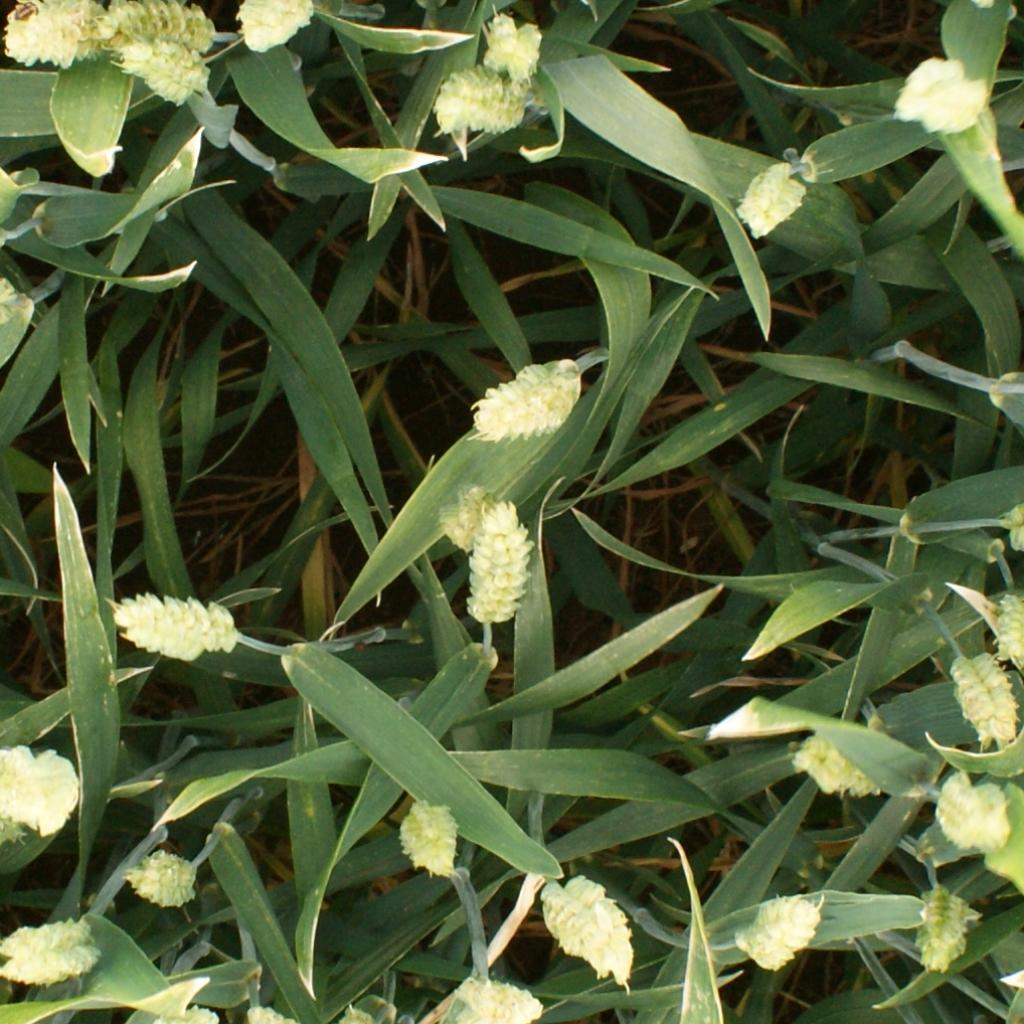

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([], device='cuda:0')
conf: tensor([], device='cuda:0')
data: tensor([], device='cuda:0', size=(0, 6))
id: None
is_track: False
orig_shape: (1024, 1024)
shape: torch.Size([0, 6])
xywh: tensor([], device='cuda:0', size=(0, 4))
xywhn: tensor([], device='cuda:0', size=(0, 4))
xyxy: tensor([], device='cuda:0', size=(0, 4))
xyxyn: tensor([], device='cuda:0', size=(0, 4))


In [43]:
results = pred_model.predict('/content/test/2fd875eaa.jpg')

for result in results:
    boxes = result.boxes
    result.show()
    print(boxes)